<a href="https://colab.research.google.com/github/arquansa/PSTB-exercises/blob/main/Week07/Day1/EX1/W7D1EX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Exercises XP#

Sample dataset
Here is the data you will need to load and use:

data = {
    'Review': [
        'At McDonald\'s the food was ok and the service was bad.',
        'I would not recommend this Japanese restaurant to anyone.',
        'I loved this restaurant when I traveled to Thailand last summer.',
        'The menu of Loving has a wide variety of options.',
        'The staff was friendly and helpful at Google\'s employees restaurant.',
        'The ambiance at Bella Italia is amazing, and the pasta dishes are delicious.',
        'I had a terrible experience at Pizza Hut. The pizza was burnt, and the service was slow.',
        'The sushi at Sushi Express is always fresh and flavorful.',
        'The steakhouse on Main Street has a cozy atmosphere and excellent steaks.',
        'The dessert selection at Sweet Treats is to die for!'
    ]
}

Exercise 1: Exploring Text Preprocessing usage, NER and POS tags
1. Create a function preprocess_text() wich will receive the data as argument and:

convert all the text in lower case and tokanize it
remove punctuation
remove stopwords
apply a lemmatizer
return the preprocessed strings

important:
after creating each function, apply it in the dataset and print the result to check that is working properly

2. Create a new dataset with the cleaned text

hint: keep two datasets: the raw data and the preprocessed data

3. Create a function perform_ner() that will receive the text as argument and perform NER tagging on it. Use spacy en_core_web_sm

hint: the function should return the entities text and label_ (example of _labels: ORG, GPE, DATE)

4. Create a function perform_pos_tagging() that will receive the text as argument and perform POS tagging on it.

hint: use nltk pos_tag method

5. Let’s apply the functions in the dataset, analyse the outputs applying it in the preprocessed data and in the raw data

hint: to understand the meaning of the different POS tags you can use:

nltk.download('tagsets')
nltk.help.upenn_tagset('NN')

Exercise 2: Plotting the word embeddings
1. Create the word embeddings using Word2Vec model to vectorize the text.

hint: use the preprocessed and tokenized dataset and use Word2Vec model from gensim.models

Print the dimensions of the Word2Vec object and analyse it. What is the vector dimensions? What it means?

2. Create a function plot_word_embeddings() that receives the word2vec object as argument and plots the embeddings dimensions in a grided plot. Use a scatter plot. Loop through the words and use annotate() method to add text labels to each point on the scatter plot.
Finally call this function to see the plots and analyse it:

Are the related words close to each other?
What can be the possible reasons for this output?

3. To enhance the analysis, you can:

Experiment with different preprocessing techniques.
Fine-tune the Word2Vec model parameters.
Explore advanced visualization techniques for word embeddings.




# Exercise 1: Exploring Text Preprocessing usage, NER and POS tags

# 1. Create a function preprocess_text() wich will receive the data as argument


In [ ]:
# prompt: Create a function preprocess_text() wich will receive the data as argument

import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')


def preprocess_text(data):
  """
  Preprocesses text data by converting to lowercase, tokenizing,
  removing punctuation and stopwords, and applying lemmatization.

  Args:
    data (dict): A dictionary containing a list of reviews under the key 'Review'.

  Returns:
    list: A list of preprocessed strings.
  """
  preprocessed_reviews = []
  lemmatizer = WordNetLemmatizer()

  for review in data['Review']:
    # Convert to lowercase and tokenize
    tokens = nltk.word_tokenize(review.lower())

    # Remove punctuation
    tokens = [token for token in tokens if token not in string.punctuation]

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]

    # Apply lemmatization
    tokens = [lemmatizer.lemmatize(token) for token in tokens]

    # Join tokens back into a string
    preprocessed_reviews.append(" ".join(tokens))

  return preprocessed_reviews

# Sample dataset (assuming it's already defined in the preceding code)
data = {
    'Review': [
        'At McDonald\'s the food was ok and the service was bad.',
        'I would not recommend this Japanese restaurant to anyone.',
        'I loved this restaurant when I traveled to Thailand last summer.',
        'The menu of Loving has a wide variety of options.',
        'The staff was friendly and helpful at Google\'s employees restaurant.',
        'The ambiance at Bella Italia is amazing, and the pasta dishes are delicious.',
        'I had a terrible experience at Pizza Hut. The pizza was burnt, and the service was slow.',
        'The sushi at Sushi Express is always fresh and flavorful.',
        'The steakhouse on Main Street has a cozy atmosphere and excellent steaks.',
        'The dessert selection at Sweet Treats is to die for!'
    ]
}

# Apply the function and print the result
preprocessed_data = preprocess_text(data)
print(preprocessed_data)

["mcdonald 's food ok service bad", 'would recommend japanese restaurant anyone', 'loved restaurant traveled thailand last summer', 'menu loving wide variety option', "staff friendly helpful google 's employee restaurant", 'ambiance bella italia amazing pasta dish delicious', 'terrible experience pizza hut pizza burnt service slow', 'sushi sushi express always fresh flavorful', 'steakhouse main street cozy atmosphere excellent steak', 'dessert selection sweet treat die']


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


#2. Create a new dataset with the cleaned text, and keep two datasets: the raw data and the preprocessed data

In [ ]:
# prompt: Create a new dataset with the cleaned text, and keep two datasets: the raw data and the preprocessed data

import pandas as pd

# Create a pandas DataFrame for the raw data
raw_df = pd.DataFrame(data)

# Create a pandas DataFrame for the preprocessed data
preprocessed_df = pd.DataFrame({'Review': preprocessed_data})

print("\nRaw Data DataFrame:")
print(raw_df)

print("\nPreprocessed Data DataFrame:")
preprocessed_df


Raw Data DataFrame:
                                              Review
0  At McDonald's the food was ok and the service ...
1  I would not recommend this Japanese restaurant...
2  I loved this restaurant when I traveled to Tha...
3  The menu of Loving has a wide variety of options.
4  The staff was friendly and helpful at Google's...
5  The ambiance at Bella Italia is amazing, and t...
6  I had a terrible experience at Pizza Hut. The ...
7  The sushi at Sushi Express is always fresh and...
8  The steakhouse on Main Street has a cozy atmos...
9  The dessert selection at Sweet Treats is to di...

Preprocessed Data DataFrame:


,Review
0,mcdonald 's food ok service bad
1,would recommend japanese restaurant anyone
2,loved restaurant traveled thailand last summer
3,menu loving wide variety option
4,staff friendly helpful google 's employee rest...
5,ambiance bella italia amazing pasta dish delic...
6,terrible experience pizza hut pizza burnt serv...
7,sushi sushi express always fresh flavorful
8,steakhouse main street cozy atmosphere excelle...
9,dessert selection sweet treat die


#3. Create a function perform_ner() that will receive the text as argument and perform NER tagging on it.
Use spacy en_core_web_sm
hint: the function should return the entities text and label_ (example of _labels: ORG, GPE, DATE)

In [ ]:
# prompt: Create a function perform_ner() that will receive the text as argument and perform NER tagging on it. Use spacy en_core_web_sm
# hint: the function should return the entities text and label_ (example of _labels: ORG, GPE, DATE)

!python -m spacy download en_core_web_sm
import spacy

def perform_ner(text):
  """
  Performs Named Entity Recognition (NER) tagging on the given text.

  Args:
    text (str): The input text.

  Returns:
    list: A list of tuples, where each tuple contains the entity text
          and its label.
  """
  nlp = spacy.load("en_core_web_sm")
  doc = nlp(text)
  entities = [(ent.text, ent.label_) for ent in doc.ents]
  return entities

# Example of applying the function to one of the raw reviews
print("\nNER on Raw Data (first review):")
print(perform_ner(raw_df['Review'][0]))

# Example of applying the function to one of the preprocessed reviews
print("\nNER on Preprocessed Data (first review):")
print(perform_ner(preprocessed_df['Review'][0]))

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 50.0 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.

NER on Raw Data (first review):
[('McDonald', 'ORG')]

NER on Preprocessed Data (first review):
[("mcdonald 's food ok service", 'ORG')]


#4. Create a function perform_pos_tagging () that will receive the text as argument and perform POS tagging on it.

hint: use nltk pos_tag method


In [ ]:
import nltk
import pandas as pd
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


# Sample dataset
data = {
    'Review': [
        'At McDonald\'s the food was ok and the service was bad.',
        'I would not recommend this Japanese restaurant to anyone.',
        'I loved this restaurant when I traveled to Thailand last summer.',
        'The menu of Loving has a wide variety of options.',
        'The staff was friendly and helpful at Google\'s employees restaurant.',
        'The ambiance at Bella Italia is amazing, and the pasta dishes are delicious.',
        'I had a terrible experience at Pizza Hut. The pizza was burnt, and the service was slow.',
        'The sushi at Sushi Express is always fresh and flavorful.',
        'The steakhouse on Main Street has a cozy atmosphere and excellent steaks.',
        'The dessert selection at Sweet Treats is to die for!'
    ]
}

# Assuming preprocessed_data is available from a previous cell execution
# For demonstration purposes, we will call the preprocess_text function here
# In a real scenario, you would ensure the previous cell defining preprocessed_data is executed first.

# Assuming preprocess_text function is defined in a previous cell and executed
# from osNZplIrR8Qy import preprocess_text # This import won't work directly in Colab cells

# To make this cell self-contained for demonstration:
def preprocess_text(data):
  """
  Preprocesses text data by converting to lowercase, tokenizing,
  removing punctuation and stopwords, and applying lemmatization.

  Args:
    data (dict): A dictionary containing a list of reviews under the key 'Review'.

  Returns:
    list: A list of preprocessed strings.
  """
  preprocessed_reviews = []
  lemmatizer = WordNetLemmatizer()

  for review in data['Review']:
    # Convert to lowercase and tokenize
    tokens = nltk.word_tokenize(review.lower())

    # Remove punctuation
    tokens = [token for token in tokens if token not in string.punctuation]

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]

    # Apply lemmatization
    tokens = [lemmatizer.lemmatize(token) for token in tokens]

    # Join tokens back into a string
    preprocessed_reviews.append(" ".join(tokens))

  return preprocessed_reviews

preprocessed_data = preprocess_text(data)


def perform_pos_tagging(text):
  """
  Performs Part-of-Speech (POS) tagging on the given text.

  Args:
    text (str): The input text.

  Returns:
    list: A list of tuples, where each tuple contains the word and its POS tag.
  """
  tokens = nltk.word_tokenize(text)
  pos_tags = nltk.pos_tag(tokens)
  return pos_tags

# Create a pandas DataFrame for the raw data
raw_df = pd.DataFrame(data)

# Create a pandas DataFrame for the preprocessed data
preprocessed_df = pd.DataFrame({'Review': preprocessed_data})


# Example of applying the function to one of the raw reviews
print("\nPOS Tagging on Raw Data (first review):")
print(perform_pos_tagging(raw_df['Review'][0]))

# Example of applying the function to one of the preprocessed reviews
print("\nPOS Tagging on Preprocessed Data (first review):")
print(perform_pos_tagging(preprocessed_df['Review'][0]))


POS Tagging on Raw Data (first review):
[('At', 'IN'), ('McDonald', 'NNP'), ("'s", 'POS'), ('the', 'DT'), ('food', 'NN'), ('was', 'VBD'), ('ok', 'JJ'), ('and', 'CC'), ('the', 'DT'), ('service', 'NN'), ('was', 'VBD'), ('bad', 'JJ'), ('.', '.')]

POS Tagging on Preprocessed Data (first review):
[('mcdonald', 'NN'), ("'s", 'POS'), ('food', 'NN'), ('ok', 'JJ'), ('service', 'NN'), ('bad', 'JJ')]


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


#5. Let’s apply the functions in the dataset, analyse the outputs applying it in the preprocessed data and in the raw data
hint: to understand the meaning of the different POS tags you can use:

nltk.download('tagsets') nltk.help.upenn_tagset('NN')

In [ ]:
# prompt: Let’s apply the functions in the dataset, analyse the outputs applying it in the preprocessed data and in the raw data hint: to understand the meaning of the different POS tags you can use:
# nltk.download('tagsets') nltk.help.upenn_tagset('NN')

import nltk
import pandas as pd
import spacy # Import spacy
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download necessary NLTK data
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('tagsets') # Download tagsets for help


# Sample dataset (assuming it's already defined in the preceding code)
data = {
    'Review': [
        'At McDonald\'s the food was ok and the service was bad.',
        'I would not recommend this Japanese restaurant to anyone.',
        'I loved this restaurant when I traveled to Thailand last summer.',
        'The menu of Loving has a wide variety of options.',
        'The staff was friendly and helpful at Google\'s employees restaurant.',
        'The ambiance at Bella Italia is amazing, and the pasta dishes are delicious.',
        'I had a terrible experience at Pizza Hut. The pizza was burnt, and the service was slow.',
        'The sushi at Sushi Express is always fresh and flavorful.',
        'The steakhouse on Main Street has a cozy atmosphere and excellent steaks.',
        'The dessert selection at Sweet Treats is to die for!'
    ]
}

def preprocess_text(data):
  """
  Preprocesses text data by converting to lowercase, tokenizing,
  removing punctuation and stopwords, and applying lemmatization.

  Args:
    data (dict): A dictionary containing a list of reviews under the key 'Review'.

  Returns:
    list: A list of preprocessed strings.
  """
  preprocessed_reviews = []
  lemmatizer = WordNetLemmatizer()

  for review in data['Review']:
    # Convert to lowercase and tokenize
    tokens = nltk.word_tokenize(review.lower())

    # Remove punctuation
    tokens = [token for token in tokens if token not in string.punctuation]

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]

    # Apply lemmatization
    tokens = [lemmatizer.lemmatize(token) for token in tokens]

    # Join tokens back into a string
    preprocessed_reviews.append(" ".join(tokens))

  return preprocessed_reviews

preprocessed_data = preprocess_text(data)

# Create a pandas DataFrame for the raw data
raw_df = pd.DataFrame(data)

# Create a pandas DataFrame for the preprocessed data
preprocessed_df = pd.DataFrame({'Review': preprocessed_data})

# Define the perform_ner function within this cell
# !python -m spacy download en_core_web_sm # Download spaCy model
try:
    nlp = spacy.load("en_core_web_sm")
except:
    !python -m spacy download en_core_web_sm
    nlp = spacy.load("en_core_web_sm")


def perform_ner(text):
  """
  Performs Named Entity Recognition (NER) tagging on the given text.

  Args:
    text (str): The input text.

  Returns:
    list: A list of tuples, where each tuple contains the entity text
          and its label.
  """
  doc = nlp(text)
  entities = [(ent.text, ent.label_) for ent in doc.ents]
  return entities

# Define the perform_pos_tagging function within this cell
def perform_pos_tagging(text):
  """
  Performs Part-of-Speech (POS) tagging on the given text.

  Args:
    text (str): The input text.

  Returns:
    list: A list of tuples, where each tuple contains the word and its POS tag.
  """
  tokens = nltk.word_tokenize(text)
  pos_tags = nltk.pos_tag(tokens)
  return pos_tags


print("\nNER Analysis on Raw Data:")
for index, row in raw_df.iterrows():
  ner_results = perform_ner(row['Review'])
  print(f"Review {index + 1}: {ner_results}")

print("\nNER Analysis on Preprocessed Data:")
for index, row in preprocessed_df.iterrows():
  ner_results = perform_ner(row['Review'])
  # Note: NER on preprocessed data might be less accurate as entity names
  # could be altered or removed during preprocessing.
  print(f"Review {index + 1}: {ner_results}")

print("\nPOS Tagging Analysis on Raw Data:")
for index, row in raw_df.iterrows():
  pos_results = perform_pos_tagging(row['Review'])
  print(f"Review {index + 1}: {pos_results}")

print("\nPOS Tagging Analysis on Preprocessed Data:")
for index, row in preprocessed_df.iterrows():
  pos_results = perform_pos_tagging(row['Review'])
  # Note: POS tagging on preprocessed data can be useful for analyzing the
  # remaining words and their grammatical roles after cleaning.
  print(f"Review {index + 1}: {pos_results}")

# You can use the following lines to understand POS tags
# nltk.download('tagsets')
# nltk.help.upenn_tagset('NN')
# nltk.help.upenn_tagset('NNP')
# nltk.help.upenn_tagset('JJ')
# nltk.help.upenn_tagset('VB')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package tagsets to /root/nltk_data...
[nltk_data]   Unzipping help/tagsets.zip.



NER Analysis on Raw Data:
Review 1: [('McDonald', 'ORG')]
Review 2: [('Japanese', 'NORP')]
Review 3: [('Thailand', 'GPE'), ('last summer', 'DATE')]
Review 4: [('Loving', 'GPE')]
Review 5: [('Google', 'ORG')]
Review 6: [('Bella Italia', 'ORG')]
Review 7: [('Pizza Hut', 'ORG')]
Review 8: [('Sushi Express', 'ORG')]
Review 9: [('Main Street', 'FAC')]
Review 10: [('Sweet Treats', 'PERSON')]

NER Analysis on Preprocessed Data:
Review 1: [("mcdonald 's food ok service", 'ORG')]
Review 2: [('japanese', 'NORP')]
Review 3: [('thailand', 'GPE'), ('last summer', 'DATE')]
Review 4: []
Review 5: [('google', 'ORG')]
Review 6: [('ambiance bella italia', 'PERSON')]
Review 7: []
Review 8: []
Review 9: []
Review 10: []

POS Tagging Analysis on Raw Data:
Review 1: [('At', 'IN'), ('McDonald', 'NNP'), ("'s", 'POS'), ('the', 'DT'), ('food', 'NN'), ('was', 'VBD'), ('ok', 'JJ'), ('and', 'CC'), ('the', 'DT'), ('service', 'NN'), ('was', 'VBD'), ('bad', 'JJ'), ('.', '.')]
Review 2: [('I', 'PRP'), ('would', 'MD')

#Exercise 2: Plotting the word embeddings

Create the word embeddings using Word2Vec model to vectorize the text. hint: use the preprocessed and tokenized dataset and use Word2Vec model from gensim.models

Print the dimensions of the Word2Vec object and analyse it. What is the vector dimensions? What it means?

Create a function plot_word_embeddings() that receives the word2vec object as argument and plots the embeddings dimensions in a grided plot. Use a scatter plot. Loop through the words and use annotate() method to add text labels to each point on the scatter plot. Finally call this function to see the plots and analyse it: Are the related words close to each other? What can be the possible reasons for this output?

To enhance the analysis, you can: Experiment with different preprocessing techniques. Fine-tune the Word2Vec model parameters. Explore advanced visualization techniques for word embeddings.

Create the word embeddings using Word2Vec model to vectorize the text. hint: use the preprocessed and tokenized dataset and use Word2Vec model from gensim.models

In [ ]:
# prompt: Create the word embeddings using Word2Vec model to vectorize the text. hint: use the preprocessed and tokenized dataset and use Word2Vec model from gensim.models

!pip uninstall -y gensim numpy
!pip install gensim
from gensim.models import Word2Vec
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download necessary NLTK data for preprocess_text
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


# Sample dataset
data = {
    'Review': [
        'At McDonald\'s the food was ok and the service was bad.',
        'I would not recommend this Japanese restaurant to anyone.',
        'I loved this restaurant when I traveled to Thailand last summer.',
        'The menu of Loving has a wide variety of options.',
        'The staff was friendly and helpful at Google\'s employees restaurant.',
        'The ambiance at Bella Italia is amazing, and the pasta dishes are delicious.',
        'I had a terrible experience at Pizza Hut. The pizza was burnt, and the service was slow.',
        'The sushi at Sushi Express is always fresh and flavorful.',
        'The steakhouse on Main Street has a cozy atmosphere and excellent steaks.',
        'The dessert selection at Sweet Treats is to die for!'
    ]
}

def preprocess_text(data):
  """
  Preprocesses text data by converting to lowercase, tokenizing,
  removing punctuation and stopwords, and applying lemmatization.

  Args:
    data (dict): A dictionary containing a list of reviews under the key 'Review'.

  Returns:
    list: A list of preprocessed strings.
  """
  preprocessed_reviews = []
  lemmatizer = WordNetLemmatizer()

  for review in data['Review']:
    # Convert to lowercase and tokenize
    tokens = nltk.word_tokenize(review.lower())

    # Remove punctuation
    tokens = [token for token in tokens if token not in string.punctuation]

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]

    # Apply lemmatization
    tokens = [lemmatizer.lemmatize(token) for token in tokens]

    # Join tokens back into a string
    preprocessed_reviews.append(" ".join(tokens))

  return preprocessed_reviews

preprocessed_data = preprocess_text(data)


# Tokenize the preprocessed data
# The preprocessed_data is a list of strings. We need a list of lists of words (tokens).
tokenized_preprocessed_data = [review.split() for review in preprocessed_data]

# Create the Word2Vec model
# window: The maximum distance between the current and predicted word within a sentence.
# min_count: Ignores all words with total frequency lower than this.
# vector_size: Dimensionality of the word vectors.
model = Word2Vec(tokenized_preprocessed_data, vector_size=100, window=5, min_count=1, workers=4)

# Print the dimensions of the Word2Vec object
print("\nWord2Vec model dimensions:")
print(f"Number of words in vocabulary: {len(model.wv)}")
print(f"Vector dimension for each word: {model.vector_size}")

# Analysis of dimensions:
# The vector dimension (here 100) means that each unique word in the vocabulary
# is represented as a vector of 100 numerical values. These values are learned
# during the training process and capture the semantic and syntactic relationships
# between words based on their co-occurrence patterns in the training data.
# Words with similar meanings or that appear in similar contexts are expected
# to have similar vector representations (i.e., their vectors will be close
# to each other in the 100-dimensional space).

Found existing installation: gensim 4.3.3
Uninstalling gensim-4.3.3:
  Successfully uninstalled gensim-4.3.3
Found existing installation: numpy 1.26.4
Uninstalling numpy-1.26.4:
  Successfully uninstalled numpy-1.26.4
  Using cached gensim-4.3.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (8.1 kB)
  Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
Using cached gensim-4.3.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (26.7 MB)
Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.3 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
opencv-python-headless 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which i

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!



Word2Vec model dimensions:
Number of words in vocabulary: 56
Vector dimension for each word: 100


Print the dimensions of the Word2Vec object and analyse it. What is the vector dimensions? What it means?

In [ ]:
# prompt: Print the dimensions of the Word2Vec object

import nltk
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from gensim.models import Word2Vec
import pandas as pd # Added import for pandas

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


# Sample dataset
data = {
    'Review': [
        'At McDonald\'s the food was ok and the service was bad.',
        'I would not recommend this Japanese restaurant to anyone.',
        'I loved this restaurant when I traveled to Thailand last summer.',
        'The menu of Loving has a wide variety of options.',
        'The staff was friendly and helpful at Google\'s employees restaurant.',
        'The ambiance at Bella Italia is amazing, and the pasta dishes are delicious.',
        'I had a terrible experience at Pizza Hut. The pizza was burnt, and the service was slow.',
        'The sushi at Sushi Express is always fresh and flavorful.',
        'The steakhouse on Main Street has a cozy atmosphere and excellent steaks.',
        'The dessert selection at Sweet Treats is to die for!'
    ]
}

def preprocess_text(data):
  """
  Preprocesses text data by converting to lowercase, tokenizing,
  removing punctuation and stopwords, and applying lemmatization.

  Args:
    data (dict): A dictionary containing a list of reviews under the key 'Review'.

  Returns:
    list: A list of preprocessed strings.
  """
  preprocessed_reviews = []
  lemmatizer = WordNetLemmatizer()

  for review in data['Review']:
    # Convert to lowercase and tokenize
    tokens = nltk.word_tokenize(review.lower())

    # Remove punctuation
    tokens = [token for token in tokens if token not in string.punctuation]

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]

    # Apply lemmatization
    tokens = [lemmatizer.lemmatize(token) for token in tokens]

    # Join tokens back into a string
    preprocessed_reviews.append(" ".join(tokens))

  return preprocessed_reviews

preprocessed_data = preprocess_text(data)


# Tokenize the preprocessed data
# The preprocessed_data is a list of strings. We need a list of lists of words (tokens).
tokenized_preprocessed_data = [review.split() for review in preprocessed_data]

# Create the Word2Vec model
# window: The maximum distance between the current and predicted word within a sentence.
# min_count: Ignores all words with total frequency lower than this.
# vector_size: Dimensionality of the word vectors.
model = Word2Vec(tokenized_preprocessed_data, vector_size=100, window=5, min_count=1, workers=4)


# Print the dimensions of the Word2Vec object
print("\nWord2Vec model dimensions:")
print(f"Number of words in vocabulary: {len(model.wv)}")
print(f"Vector dimension for each word: {model.vector_size}")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!



Word2Vec model dimensions:
Number of words in vocabulary: 56
Vector dimension for each word: 100


# 2. Create a function plot_word_embeddings() that receives the word2vec object as argument and plots the embeddings dimensions in a grided plot.

Use a scatter plot. Loop through the words and use annotate() method to add text labels to each point on the scatter plot. Finally call this function to see the plots and analyse it: Are the related words close to each other? What can be the possible reasons for this output?

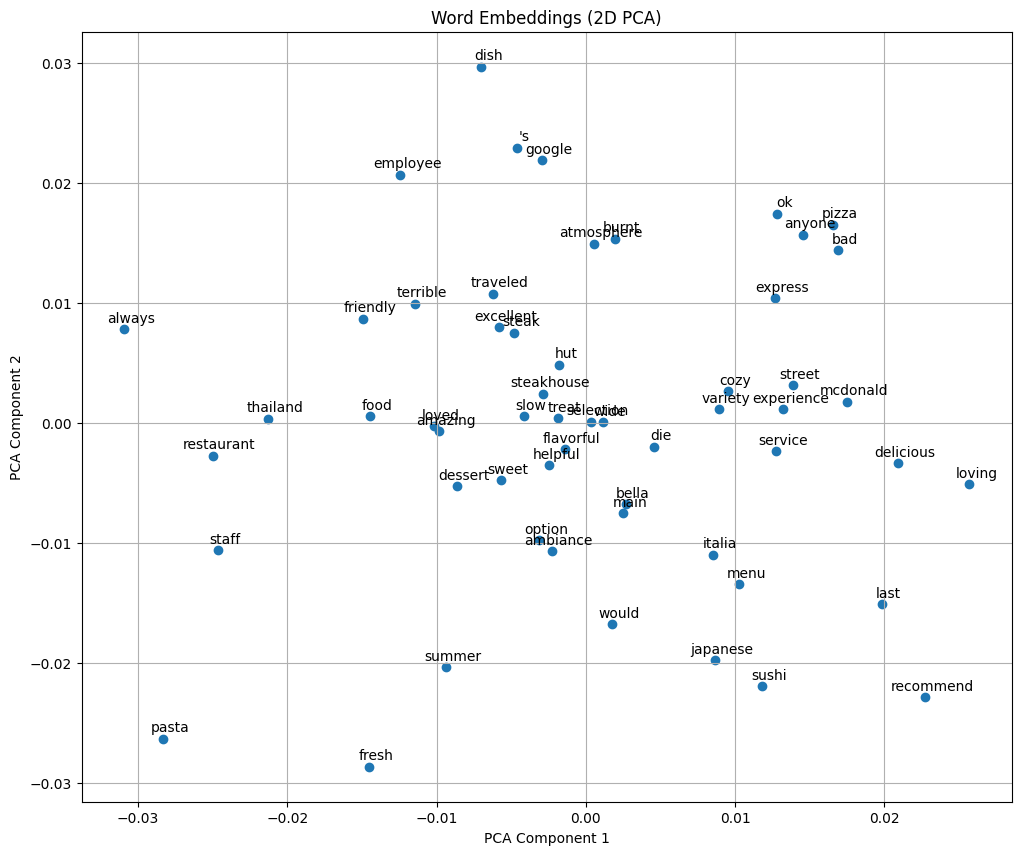

In [ ]:
# prompt: Create a function plot_word_embeddings() that receives the word2vec object as argument and plots the embeddings dimensions in a grided plot. Use a scatter plot. Loop through the words and use annotate() method to add text labels to each point on the scatter plot. Finally call this function to see the plots

import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

def plot_word_embeddings(word2vec_model):
  """
  Plots word embeddings in a 2D space using PCA for dimensionality reduction.

  Args:
    word2vec_model (gensim.models.Word2Vec): The trained Word2Vec model.
  """
  # Get the word vectors and their corresponding words
  words = list(word2vec_model.wv.index_to_key)
  vectors = word2vec_model.wv[words]

  # Use PCA to reduce dimensionality to 2 for plotting
  pca = PCA(n_components=2)
  vectors_2d = pca.fit_transform(vectors)

  # Create a figure and axes for the plot
  plt.figure(figsize=(12, 10))

  # Create a scatter plot of the 2D vectors
  plt.scatter(vectors_2d[:, 0], vectors_2d[:, 1])

  # Annotate each point with its corresponding word
  for i, word in enumerate(words):
    plt.annotate(word, (vectors_2d[i, 0], vectors_2d[i, 1]), textcoords="offset points", xytext=(5,5), ha='center')

  plt.title('Word Embeddings (2D PCA)')
  plt.xlabel('PCA Component 1')
  plt.ylabel('PCA Component 2')
  plt.grid(True)
  plt.show()

# Call the function to plot the word embeddings
plot_word_embeddings(model)

# Analysis of the plot:
# - Observe if semantically similar words (e.g., 'restaurant', 'food', 'service')
#   appear close to each other in the plot.
# - In this small dataset and simple Word2Vec model, the relationships might not
#   be very clear or accurate.
# - Possible reasons for the output:
#   - Limited data size: Word embeddings are more effective with larger datasets.
#   - Simple model parameters: Fine-tuning parameters like vector_size, window size,
#     and min_count can improve results.
#   - Quality of preprocessing: Different preprocessing steps might affect the embeddings.
#   - Complexity of relationships: Some semantic relationships might require higher
#     dimensions to be captured accurately.

# Further steps to enhance analysis:
# - Experiment with different `vector_size`, `window`, and `min_count` values
#   when training the Word2Vec model.
# - Use a larger and more diverse dataset.
# - Explore other visualization techniques like t-SNE for potentially better
#   clustering of similar words.
# - Train more complex language models.

# Word Embedding Visualization